In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats
from plotnine import *

In [4]:
# convert the date to date
# format shoube be %Y %b (%d)
def to_date(pulication_date):
    dates = []
    for x in pulication_date:
        try:
            d = datetime.strptime(x, '%Y %b %d')
        except ValueError:
            try: 
                d = datetime.strptime(x,'%Y %b')
            except ValueError:
                d = None
        dates.append(d)    
    return dates

# calculate summary statistics 
def summary(x):
    return{
        'mean': np.mean(x),
        'std': np.std(x),
        'range': (np.min(x), np.max(x)),
        'quantiles': np.quantile(x, [0.25, 0.50, 0.75])
    }

In [5]:
# read the csv file
csv_f = 'HIV.csv'
hiv_df = pd.read_csv(csv_f, index_col=0)
hiv_df['date'] = to_date(hiv_df['DP'])
hiv_df['month'] = hiv_df['date'].dt.to_period('M')
per_month = hiv_df.groupby(['month'])['month'].count()
per_month

month
2019-11      1
2019-12      8
2020-01    242
2020-02    441
2020-03    669
2020-04    736
2020-05    787
2020-06    919
2020-07    960
2020-08    965
2020-09    394
2020-10    292
2020-11    186
2020-12    176
2021-01     98
2021-02    104
2021-03     70
2021-04     54
2021-05     41
2021-06     38
2021-07     25
2021-08     22
2021-09     17
2021-10     20
2021-11     14
2021-12     10
2022-01      1
Freq: M, Name: month, dtype: int64

In [6]:
summary(per_month)

{'mean': 270.0,
 'std': 329.4411654324357,
 'range': (1, 965),
 'quantiles': array([ 21. ,  98. , 417.5])}

In [7]:
hiv_df_month = per_month.to_frame()
hiv_df_month = hiv_df_month.rename(columns={'month': 'count'})
hiv_df_month['month'] = hiv_df_month.index
hiv_df_month['count_lci'] = stats.poisson.ppf(0.05, per_month.values)
hiv_df_month['count_rci'] = stats.poisson.ppf(0.95, per_month.values)

In [8]:
hiv_df_month 

,count,month,count_lci,count_rci
month,,,,
2019-11,1,2019-11,0.0,3.0
2019-12,8,2019-12,4.0,13.0
2020-01,242,2020-01,217.0,268.0
2020-02,441,2020-02,407.0,476.0
2020-03,669,2020-03,627.0,712.0
2020-04,736,2020-04,692.0,781.0
2020-05,787,2020-05,741.0,833.0
2020-06,919,2020-06,869.0,969.0
2020-07,960,2020-07,909.0,1011.0


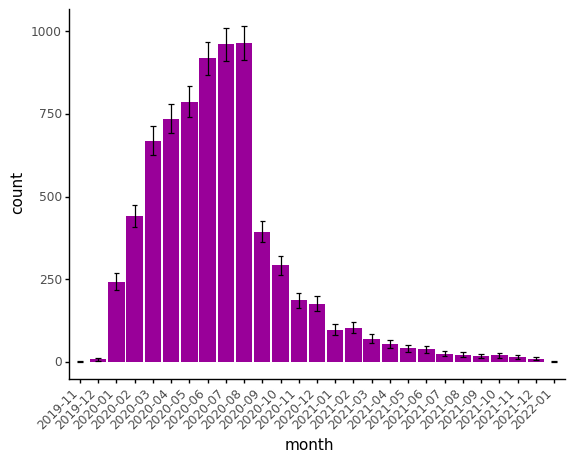

<ggplot: (8761632832422)>

In [9]:
(
    ggplot(hiv_df_month, aes(x='month', y='count')) +
        theme_classic() +
        geom_col(fill='#990099') +
        geom_errorbar(
            aes(ymin='count_lci', ymax='count_rci'),
            width = 0.3
        ) +
        theme(axis_text_x = element_text(angle=45, hjust=1))
)